In [88]:
import pandas as pd

In [89]:
#Read csv file  Salary Data 
File_path = "Salary Data.csv"

In [90]:
#Create Slary DataFrame
salary_data_df = pd.read_csv(File_path)
salary_data_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [91]:
# Check detail of the data
print(salary_data_df)

      Age  Gender Education Level                      Job Title   
0    32.0    Male      Bachelor's              Software Engineer  \
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [94]:
# Check for null or missing values in the DataFrame
print(salary_data_df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [95]:
# Fill missing values with 0
salary_data_df.fillna(0, inplace=True)

# Remove duplicates if any
salary_data_df.drop_duplicates(inplace=True)

# Convert 'Salary' and 'Years of Experience' columns to numeric
salary_data_df['Salary'] = pd.to_numeric(salary_data_df['Salary'], errors='coerce')
salary_data_df['Years of Experience'] = pd.to_numeric(salary_data_df['Years of Experience'], errors='coerce')

# Rename columns for clarity
salary_data_df.rename(columns={
    'Years of Experience': 'Years_Exp',
    'Salary': 'Annual_Salary',
    'Education Level': 'Education_Level',
    'Job Title': 'Job_Title'
}, inplace=True)

# Print the cleaned DataFrame
print("\nCleaned DataFrame:")
print(salary_data_df.head())



Cleaned DataFrame:
    Age  Gender Education_Level          Job_Title  Years_Exp  Annual_Salary
0  32.0    Male      Bachelor's  Software Engineer        5.0        90000.0
1  28.0  Female        Master's       Data Analyst        3.0        65000.0
2  45.0    Male             PhD     Senior Manager       15.0       150000.0
3  36.0  Female      Bachelor's    Sales Associate        7.0        60000.0
4  52.0    Male        Master's           Director       20.0       200000.0


In [96]:
# Calculate the average salary
average_salary = salary_data_df['Annual_Salary'].mean()

# Print the average salary
print("\nAverage Annual Salary:", average_salary)


Average Annual Salary: 99678.0


In [97]:
# Calculate the standard deviation of 'Annual_Salary'
salary_std_deviation = salary_data_df['Annual_Salary'].std()

# Print the standard deviation
print("\nStandard Deviation of Annual Salary:", salary_std_deviation)


Standard Deviation of Annual Salary: 48892.72160481482


In [98]:
# Calculate the average salary for the 'Male' category
average_salary_male = salary_data_df[salary_data_df['Gender'] == 'Male']['Annual_Salary'].mean()

# Print the average salary for Male
print("\nAverage Annual Salary for Male:", average_salary_male)


Average Annual Salary for Male: 103472.64705882352


In [99]:
# Calculate the average salary for the 'Female' category
average_salary_female = salary_data_df[salary_data_df['Gender'] == 'Female']['Annual_Salary'].mean()

# Print the average salary for Female
print("\nAverage annual Salary for Female:", average_salary_female)


Average annual Salary for Female: 96136.36363636363


In [100]:
# Calculate the average 'Annual_Salary' for each 'Education_Level' category
average_salary_by_education = salary_data_df.groupby('Education_Level')['Annual_Salary'].mean()
# Round the average salary to two decimal places
average_salary_by_education = average_salary_by_education.round(2)
# Print the average salary for each education level category
print("\nAverage  Annual Salary by Education Level:")
print(average_salary_by_education)


Average  Annual Salary by Education Level:
Education_Level
0                  0.00
Bachelor's     73902.36
Master's      127912.09
PhD           158095.24
Name: Annual_Salary, dtype: float64


In [101]:
import pandas as pd

# Calculate the average 'Annual_Salary' for each 'Education_Level' for Male and Female
average_salary_by_gender_education = salary_data_df.groupby(['Gender', 'Education_Level'])['Annual_Salary'].mean()

# Display the results
print("Average Annual Salary for both Male and Female by Education Level:")
print(average_salary_by_gender_education)


Average Annual Salary for both Male and Female by Education Level:
Gender  Education_Level
0       0                       0.000000
Female  Bachelor's          70517.241379
        Master's           119375.000000
        PhD                154736.842105
Male    Bachelor's          76734.134615
        Master's           137441.860465
        PhD                160869.565217
Name: Annual_Salary, dtype: float64


In [102]:
import pandas as pd
import plotly.graph_objects as go

# Calculate the average 'Annual_Salary' for each 'Education_Level' category
average_salary_by_education = salary_data_df.groupby('Education_Level')['Annual_Salary'].mean().round(2)

# Calculate the average 'Annual_Salary' for each combination of 'Gender' and 'Education_Level'
average_salary_by_gender_education = salary_data_df.groupby(['Gender', 'Education_Level'])['Annual_Salary'].mean().round(2)

# Separate the data for Male and Female
male_data_df = salary_data_df[salary_data_df['Gender'] == 'Male']
female_data_df = salary_data_df[salary_data_df['Gender'] == 'Female']

# Create dynamic line graphs using plotly
fig = go.Figure()

# Plot the average salary by education level for Male employees
male_average_salary_by_education = male_data_df.groupby('Education_Level')['Annual_Salary'].mean().round(2)
fig.add_trace(go.Scatter(x=male_average_salary_by_education.index,
                         y=male_average_salary_by_education.values,
                         mode='lines+markers',
                         name='Male',
                         line=dict(color='blue')))

# Plot the average salary by education level for Female employees
female_average_salary_by_education = female_data_df.groupby('Education_Level')['Annual_Salary'].mean().round(2)
fig.add_trace(go.Scatter(x=female_average_salary_by_education.index,
                         y=female_average_salary_by_education.values,
                         mode='lines+markers',
                         name='Female',
                         line=dict(color='red')))

# Concatenate the data for 'Overall' (all genders) and plot
overall_average_salary_by_education = pd.concat([male_average_salary_by_education, female_average_salary_by_education])
overall_average_salary_by_education = overall_average_salary_by_education.groupby(level=0).mean().round(2)

fig.add_trace(go.Scatter(x=overall_average_salary_by_education.index,
                         y=overall_average_salary_by_education.values,
                         mode='lines+markers',
                         name='Overall (All Genders)',
                         line=dict(color='green', dash='dash')))  # Using 'dash' parameter to make it a dashed line

# Set the chart title and labels
fig.update_layout(title="Average Annual Salary by Education Level",
                  xaxis_title="Education Level",
                  yaxis_title="Average Annual Salary",
                  legend=dict(x=0.1, y=0.9),
                  width=800, height=500)

# Show the chart
fig.show()


In [103]:
# Filter the DataFrame for 'Female' gender
female_data_df = salary_data_df[salary_data_df['Gender'] == 'Female']

# Calculate the average 'Annual_Salary' for each combination of 'Gender' and 'Years_Exp' for 'Female' gender
average_salary_female_by_experience = female_data_df.groupby(['Gender', 'Years_Exp'])['Annual_Salary'].mean()

# Round the average salary to two decimal places
average_salary_female_by_experience = average_salary_female_by_experience.round(2)

# Print the average salary for each combination of Gender and Years_Exp for 'Female' gender
print("\nAverage Salary by Gender and Years of Experience (Female):")
print(average_salary_female_by_experience)


Average Salary by Gender and Years of Experience (Female):
Gender  Years_Exp
Female  0.0           35000.00
        0.5           35000.00
        1.0           40000.00
        1.5           42500.00
        2.0           42500.00
        3.0           48571.43
        4.0           53333.33
        5.0           62272.73
        6.0           80000.00
        7.0           70000.00
        8.0           80000.00
        9.0          100000.00
        10.0          93181.82
        11.0          94000.00
        12.0          99090.91
        13.0         112857.14
        14.0         120000.00
        15.0         128000.00
        16.0         158571.43
        17.0         130000.00
        18.0         146000.00
        19.0         150000.00
        20.0         180000.00
        21.0         178000.00
        22.0         156000.00
        23.0         177500.00
        25.0         170000.00
Name: Annual_Salary, dtype: float64


In [104]:
# Filter the DataFrame for 'Male' gender
male_data_df = salary_data_df[salary_data_df['Gender'] == 'Male']

# Calculate the average 'Annual_Salary' for each combination of 'Gender' and 'Years_Exp' for 'Female' gender
average_salary_male_by_experience = male_data_df.groupby(['Gender', 'Years_Exp'])['Annual_Salary'].mean()

# Round the average salary to two decimal places
average_salary_male_by_experience = average_salary_male_by_experience.round(2)

# Print the average salary for each combination of Gender and Years_Exp for 'Female' gender
print("\nAverage Salary by Gender and Years of Experience (Male):")
print(average_salary_male_by_experience)


Average Salary by Gender and Years of Experience (Male):
Gender  Years_Exp
Male    0.0           32500.00
        1.0           36250.00
        1.5           29070.00
        2.0           41875.00
        3.0           54230.77
        4.0           61000.00
        5.0           67000.00
        6.0           84166.67
        7.0           86923.08
        8.0           92916.67
        9.0          102916.67
        10.0         113000.00
        11.0         110000.00
        12.0         118333.33
        13.0         133333.33
        14.0         127000.00
        15.0         135000.00
        16.0         156875.00
        17.0         151666.67
        18.0         147500.00
        19.0         167083.33
        20.0         163888.89
        21.0         168333.33
        22.0         166666.67
        24.0         250000.00
        25.0         215000.00
Name: Annual_Salary, dtype: float64


In [105]:
import pandas as pd
import plotly.graph_objects as go

# Calculate the average 'Annual_Salary' for each combination of 'Gender' and 'Years_Exp'
average_salary_by_gender_experience = salary_data_df.groupby(['Gender', 'Years_Exp'])['Annual_Salary'].mean()

# Reset the index for plotting
average_salary_by_gender_experience = average_salary_by_gender_experience.reset_index()

# Round the average salary to two decimal places
average_salary_by_gender_experience['Annual_Salary'] = average_salary_by_gender_experience['Annual_Salary'].round(2)

# Separate the data for Female and Male employees
female_data_df = average_salary_by_gender_experience[average_salary_by_gender_experience['Gender'] == 'Female']
male_data_df = average_salary_by_gender_experience[average_salary_by_gender_experience['Gender'] == 'Male']

# Check if data is available for Female and Male employees
if not female_data_df.empty:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=female_data_df['Years_Exp'], y=female_data_df['Annual_Salary'],
                             mode='lines+markers', name='Female', line=dict(color='red')))

if not male_data_df.empty:
    fig.add_trace(go.Scatter(x=male_data_df['Years_Exp'], y=male_data_df['Annual_Salary'],
                             mode='lines+markers', name='Male', line=dict(color='blue')))

# Plot the average salary for all employees (both genders)
average_salary_all_by_years_exp = salary_data_df.groupby('Years_Exp')['Annual_Salary'].mean().reset_index()
fig.add_trace(go.Scatter(x=average_salary_all_by_years_exp['Years_Exp'],
                         y=average_salary_all_by_years_exp['Annual_Salary'],
                         mode='lines+markers', name='All', line=dict(color='green')))

# Set the chart title and labels
fig.update_layout(title="Average Annual Salary by Years of Experience",
                  xaxis_title="Years of Experience",
                  yaxis_title="Average Annual Salary",
                  legend=dict(x=0.1, y=0.9),
                  width=800, height=500)

# Show the chart
fig.show()


In [106]:
# Calculate the average 'Annual_Salary' for each 'Job_Title' category
average_salary_by_job_title = salary_data_df.groupby('Job_Title')['Annual_Salary'].mean()
# Round the average salary to two decimal places
average_salary_by_job_title = average_salary_by_job_title.round(2)
# Print the average salary for each education level category
print("\nAverage Salary by Job Title Level:")
print(average_salary_by_job_title)


Average Salary by Job Title Level:
Job_Title
0                                0.0
Account Manager              75000.0
Accountant                   55000.0
Administrative Assistant     50000.0
Business Analyst             77500.0
                              ...   
UX Designer                  80000.0
UX Researcher                65000.0
VP of Finance               200000.0
VP of Operations            190000.0
Web Developer                65000.0
Name: Annual_Salary, Length: 175, dtype: float64


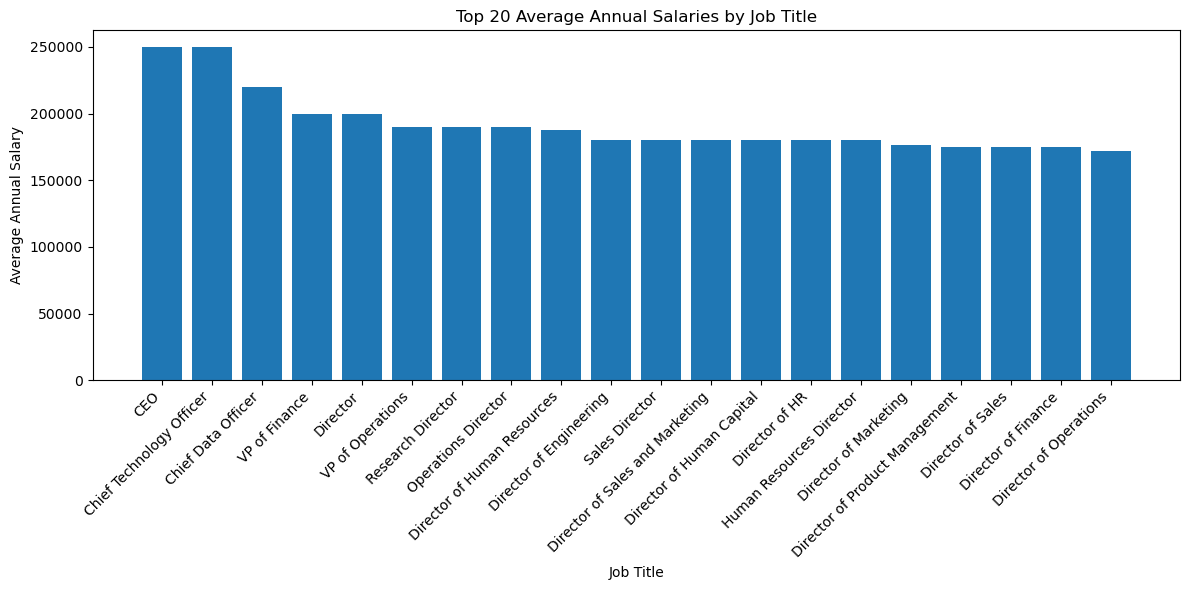

In [107]:
import matplotlib.pyplot as plt
# Sort the average_salary_by_job_title in descending order
sorted_average_salary = average_salary_by_job_title.sort_values(ascending=False)

# Get the top 20 job titles and their average salaries
top_10_titles = sorted_average_salary.head(20)

# Create a bar chart for the top 10 job titles
plt.figure(figsize=(12, 6))
plt.bar(top_10_titles.index, top_10_titles.values)
plt.xlabel('Job Title')
plt.ylabel('Average Annual Salary')
plt.title('Top 20 Average Annual Salaries by Job Title')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility

# Show the chart
plt.tight_layout()
plt.show()

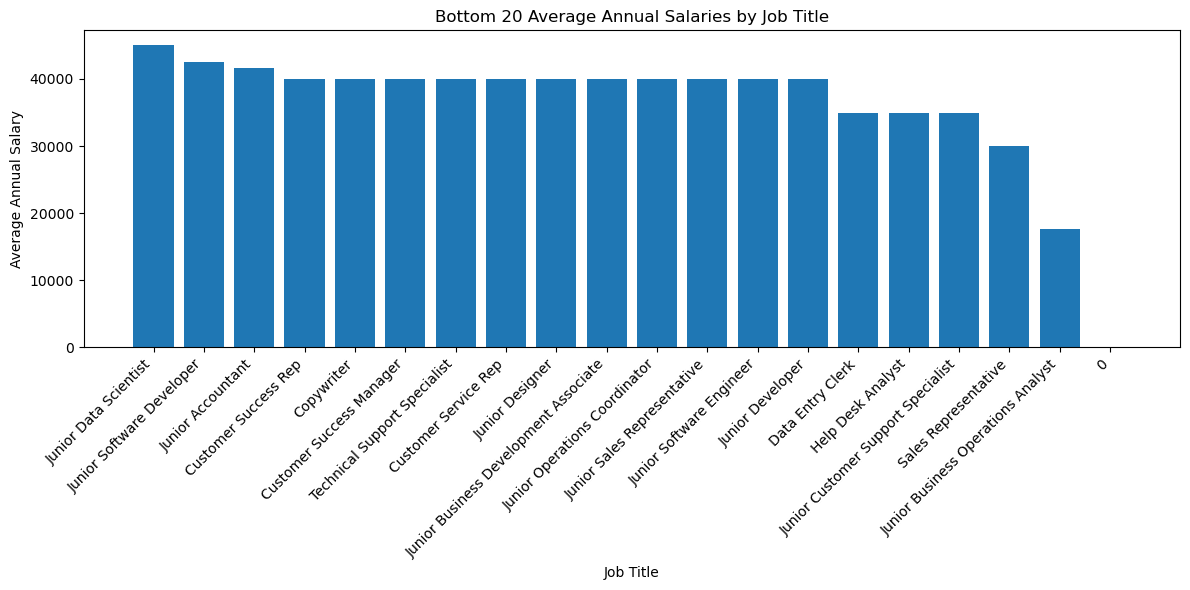

In [108]:
import matplotlib.pyplot as plt

# Get the bottom 20 job titles and their average salaries
bottom_20_titles = sorted_average_salary.tail(20)

# Create a bar chart for the bottom 20 job titles
fig, ax = plt.subplots(figsize=(12, 6))

def update(frame):
    ax.clear()
    ax.bar(bottom_20_titles.index.astype(str)[:frame+1], bottom_20_titles.values[:frame+1])
    ax.set_xlabel('Job Title')
    ax.set_ylabel('Average Annual Salary')
    ax.set_title('Bottom 20 Average Annual Salaries by Job Title')
    ax.tick_params(axis='x', rotation=45, ha='right')
    ax.set_ylim(0, bottom_20_titles.max() + 1000)  # Adjust y-axis limit for better visualization

# If you want to display a static plot (last frame of the animation), use the following line:
plt.bar(bottom_20_titles.index.astype(str), bottom_20_titles.values)
plt.xlabel('Job Title')
plt.ylabel('Average Annual Salary')
plt.title('Bottom 20 Average Annual Salaries by Job Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [109]:
# Calculate the average 'Annual_Salary' for each 'Years_Exp' category
average_salary_by_experience = salary_data_df.groupby('Years_Exp')['Annual_Salary'].mean()
# Round the average salary to two decimal places
average_salary_by_experience = average_salary_by_experience.round(2)
# Print the average salary for each experience level category
print("\nAverage Annual Salary by Experience Level:")
print(average_salary_by_experience)



Average Annual Salary by Experience Level:
Years_Exp
0.0      25000.00
0.5      35000.00
1.0      37857.14
1.5      36395.45
2.0      42115.38
3.0      51296.30
4.0      58125.00
5.0      63750.00
6.0      82272.73
7.0      83750.00
8.0      89117.65
9.0     101842.11
10.0     99375.00
11.0    101111.11
12.0    103214.29
13.0    119000.00
14.0    123181.82
15.0    129166.67
16.0    157666.67
17.0    143000.00
18.0    146818.18
19.0    165769.23
20.0    168846.15
21.0    172727.27
22.0    160000.00
23.0    177500.00
24.0    250000.00
25.0    200000.00
Name: Annual_Salary, dtype: float64


In [110]:
# Calculate the average 'Annual_Salary' for each 'Education_Level' category
average_salary_by_education = salary_data_df.groupby('Education_Level')['Annual_Salary'].mean()
# Round the average salary to two decimal places
average_salary_by_education = average_salary_by_education.round(2)
# Print the average salary for each education level category
print("\nAverage  Annual Salary by Education Level:")
print(average_salary_by_education)


Average  Annual Salary by Education Level:
Education_Level
0                  0.00
Bachelor's     73902.36
Master's      127912.09
PhD           158095.24
Name: Annual_Salary, dtype: float64


In [111]:
salary_data_df.dtypes

Age                float64
Gender              object
Education_Level     object
Job_Title           object
Years_Exp          float64
Annual_Salary      float64
dtype: object